# Causality analysis with new data

**Senior Thesis Project**

_Project Lead: Heather Fettke von Koeckritz_

_Project Advisor: Prof. Maria J. Molina_

Imports

In [1]:
import numpy as np
import xarray as xr
import cftime 
import matplotlib.pyplot as plt
from scipy import signal
import cartopy
import cartopy.crs as ccrs

Functions

In [2]:
# Loading in the CA time series files

files_SAIJET = [
    '/glade/scratch/molina/cali_jet_sai.001.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.002.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.003.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.004.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.005.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.006.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.007.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.008.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.009.PSL.nc',
    '/glade/scratch/molina/cali_jet_sai.010.PSL.nc'
]

files_SSPJET = [
    '/glade/scratch/molina/cali_jet_ssp.001.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.002.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.003.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.004.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.005.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.006.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.007.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.008.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.009.PSL.nc',
    '/glade/scratch/molina/cali_jet_ssp.010.PSL.nc'
]

files_PRECIP_SAI=[
    '/glade/scratch/molina/cali_precip_sai.001.PRECT.nc', 
    '/glade/scratch/molina/cali_precip_sai.002.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.003.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.004.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.005.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.006.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.007.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.008.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.009.PRECT.nc',
    '/glade/scratch/molina/cali_precip_sai.010.PRECT.nc'
]

files_PRECIP_SSP=[
    '/glade/scratch/molina/cali_precip_ssp.001.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.002.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.003.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.004.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.005.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.006.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.007.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.008.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.009.PRECT.nc',
    '/glade/scratch/molina/cali_precip_ssp.010.PRECT.nc'
]

files_TEMPSAI=[
    '/glade/scratch/molina/cali_temp_sai.001.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.002.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.003.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.004.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.005.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.006.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.007.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.008.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.009.TS.nc',
    '/glade/scratch/molina/cali_temp_sai.010.TS.nc'
]   

files_TEMPSSP=[
    '/glade/scratch/molina/cali_temp_ssp.001.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.002.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.003.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.004.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.005.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.006.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.007.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.008.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.009.TS.nc',
    '/glade/scratch/molina/cali_temp_ssp.010.TS.nc'
]    
    
files_ENSOSAI=[
    '/glade/scratch/molina/enso_temp_sai.001.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.002.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.003.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.004.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.005.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.006.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.007.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.008.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.009.TS.nc',
    '/glade/scratch/molina/enso_temp_sai.010.TS.nc'
]   

files_ENSOSSP=[
    '/glade/scratch/molina/enso_temp_ssp.001.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.002.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.003.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.004.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.005.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.006.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.007.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.008.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.009.TS.nc',
    '/glade/scratch/molina/enso_temp_ssp.010.TS.nc'
]   

In [3]:
# enso
ds_enso_ssp = xr.open_dataset(files_ENSOSSP[0])['TS']
ds_enso_sai = xr.open_dataset(files_ENSOSAI[0])['TS']

# jet
ds_jet_ssp = xr.open_dataset(files_SSPJET[0])['PSL']
ds_jet_sai = xr.open_dataset(files_SAIJET[0])['PSL']

# precip
ds_prec_ssp = xr.open_dataset(files_PRECIP_SSP[0])['PRECT']
ds_prec_sai = xr.open_dataset(files_PRECIP_SAI[0])['PRECT']

# temp
ds_temp_ssp = xr.open_dataset(files_TEMPSSP[0])['TS']
ds_temp_sai = xr.open_dataset(files_TEMPSAI[0])['TS']

In [4]:
# split ssp climates (current and future)
# focusing on DJF (Dec-Feb)

# current = 2015-2035
ds_enso_ssp_current = ds_enso_ssp.sel(time=slice('2015-12-01T00:00:00.000000000','2035-02-01T00:00:00.000000000'))
ds_jet_ssp_current  = ds_jet_ssp.sel( time=slice('2015-12-01T00:00:00.000000000','2035-02-01T00:00:00.000000000'))
ds_prec_ssp_current = ds_prec_ssp.sel(time=slice('2015-12-01T00:00:00.000000000','2035-02-01T00:00:00.000000000'))
ds_temp_ssp_current = ds_temp_ssp.sel(time=slice('2015-12-01T00:00:00.000000000','2035-02-01T00:00:00.000000000'))

# future = 2035-2069
ds_enso_ssp_future = ds_enso_ssp.sel(time=slice('2035-12-01T00:00:00.000000000','2069-02-01T00:00:00.000000000'))
ds_jet_ssp_future  = ds_jet_ssp.sel( time=slice('2035-12-01T00:00:00.000000000','2069-02-01T00:00:00.000000000'))
ds_prec_ssp_future = ds_prec_ssp.sel(time=slice('2035-12-01T00:00:00.000000000','2069-02-01T00:00:00.000000000'))
ds_temp_ssp_future = ds_temp_ssp.sel(time=slice('2035-12-01T00:00:00.000000000','2069-02-01T00:00:00.000000000'))

In [5]:
# double checking values are correct for current and future (looks good!)
print(ds_enso_ssp_current.coords['time'])
print(ds_enso_ssp_future.coords['time'])

<xarray.DataArray 'time' (time: 20)>
array(['2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2023-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2025-12-01T00:00:00.000000000', '2026-12-01T00:00:00.000000000',
       '2027-12-01T00:00:00.000000000', '2028-12-01T00:00:00.000000000',
       '2029-12-01T00:00:00.000000000', '2030-12-01T00:00:00.000000000',
       '2031-12-01T00:00:00.000000000', '2032-12-01T00:00:00.000000000',
       '2033-12-01T00:00:00.000000000', '2034-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-12-01 2016-12-01 ... 2034-12-01
<xarray.DataArray 'time' (time: 34)>
array(['2035-12-01T00:00:00.000000000', '2036-12-01T00:00:00.000000000',
       

# Data is ready!

### Focusing first on current climate

In [6]:
enso = ds_enso_ssp_current
jet = ds_jet_ssp_current
precip = ds_prec_ssp_current
temperature = ds_temp_ssp_current

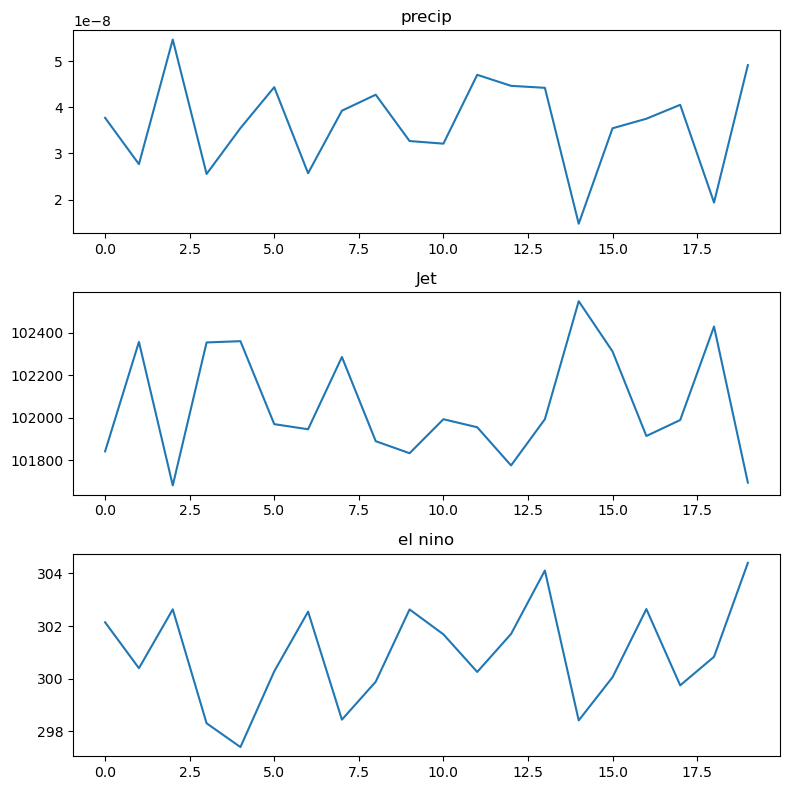

In [7]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(precip)
plt.title('precip')
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [8]:
# z-score
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET  = (jet - np.mean(jet.data)) / np.std(jet.data)
CA   = (precip - np.mean(precip.data)) / np.std(precip.data)

In [9]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

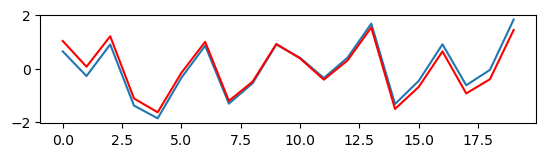

In [10]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [11]:
import statsmodels.api as sm

In [12]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================

X = np.stack([ENSO_detrend, JET]).T

Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

The regression coeff of ENSO on CA conditioned on Jet is  -0.39
The regression coeff. of Jet on CA is  -1.04


In [13]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

The causal effect of ENSO on CA is  0.42


In [14]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet, 2))

The causal effect of ENSO on Jet is  -0.78


In [15]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca, 2))

The causal effect of Jet on CA is  -0.75


### Now working on future climate

In [16]:
enso = ds_enso_ssp_future
jet = ds_jet_ssp_future
precip = ds_prec_ssp_future
temperature = ds_temp_ssp_future

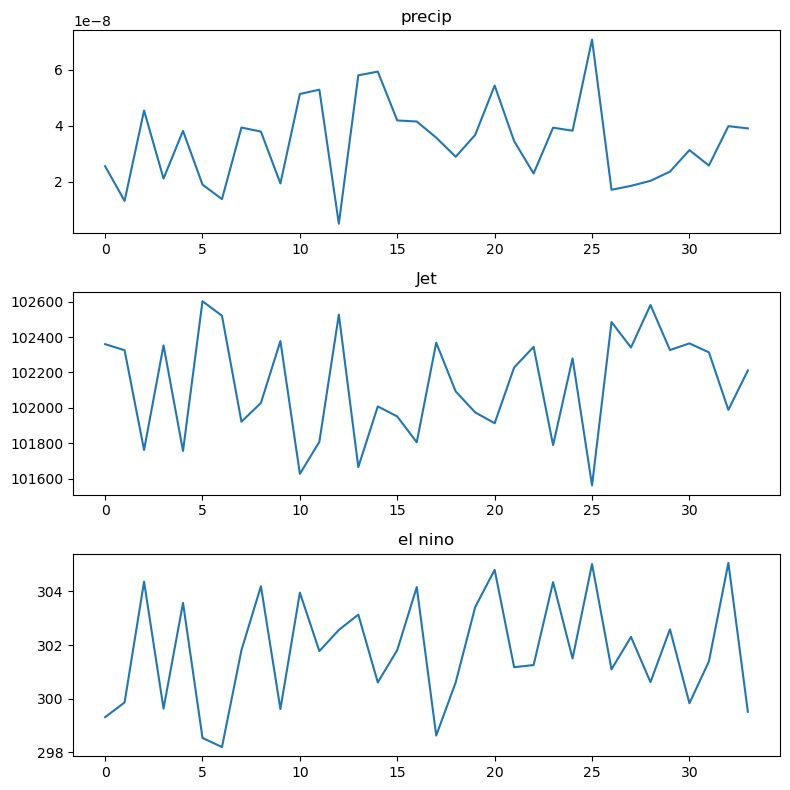

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(precip)
plt.title('precip')
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [18]:
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET = (jet - np.mean(jet.data)) / np.std(jet.data)
CA = (precip - np.mean(precip.data)) / np.std(precip.data)

In [19]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

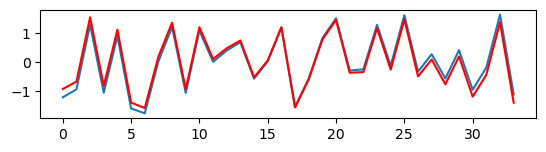

In [20]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [21]:
import statsmodels.api as sm

In [22]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================

X = np.stack([ENSO_detrend, JET]).T

Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

The regression coeff of ENSO on CA conditioned on Jet is  -0.36
The regression coeff. of Jet on CA is  -1.15


In [23]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

The causal effect of ENSO on CA is  0.55


In [24]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet,2))

The causal effect of ENSO on Jet is  -0.79


In [25]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca,2))

The causal effect of Jet on CA is  -0.88


### Now finally doing SAI!

In [26]:
enso = ds_enso_sai
jet = ds_jet_sai
precip = ds_prec_sai
temperature = ds_temp_sai

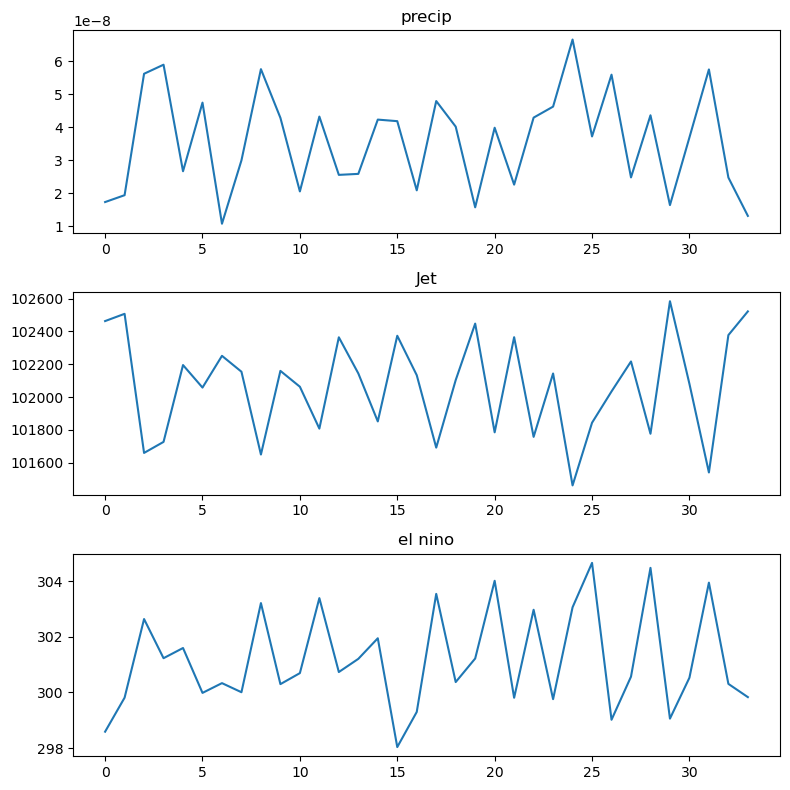

In [27]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(precip)
plt.title('precip')
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [28]:
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET = (jet - np.mean(jet.data)) / np.std(jet.data)
CA = (precip - np.mean(precip.data)) / np.std(precip.data)

In [29]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

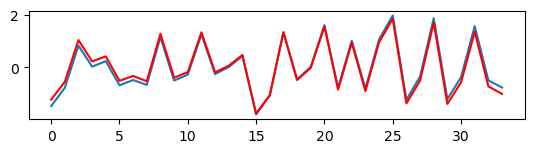

In [30]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [31]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================

X = np.stack([ENSO_detrend, JET]).T

Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

The regression coeff of ENSO on CA conditioned on Jet is  -0.51
The regression coeff. of Jet on CA is  -1.24


In [32]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

The causal effect of ENSO on CA is  0.49


In [33]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet,2))

The causal effect of ENSO on Jet is  -0.81


In [34]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca,2))

The causal effect of Jet on CA is  -0.83
